In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv('./movie_metadata.csv', error_bad_lines=False).drop_duplicates()
df.head(4)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000


### 1. What's the probability that a movie was longer than (a) an hour and a half? (b) Two hours?

### (a) an hour and a half:

In [19]:
prob = (df[df['duration'] > 90].count() / df['duration'].count()) * 100
print('{:.2f}%'.format(prob['duration']))

81.02%


### (b) Two hours

In [20]:
prob = (df[df['duration'] > 120].count() / df['duration'].count()) * 100
print('{:.2f}%'.format(prob['duration']))

21.31%


### 2. What's the probability that a movie was directed by Steven Spielberg?

In [21]:
prob = df[df['director_name'] == 'Steven Spielberg'].count() / df['director_name'].count() * 100
print('{:.2f}%'.format(prob['director_name']))

0.53%


### 3. What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [26]:
clint = df[df['director_name'] == 'Clint Eastwood']
prob = clint[clint['gross'] < clint['budget']].count() / clint.count() * 100
print('{:.2f}%'.format(prob['director_name']))

35.00%


### 4. What's the probability that a movie generally grossed more than its budget?

In [29]:
prob = df[df['gross'] > df['budget']].count() / df['gross'].count() * 100
print('{:.2f}%'.format(prob['gross']))

49.27%


### 5. What's the probability that a movie grossed over the average gross of this data set?

In [32]:
prob = df[df['gross'] > df['gross'].mean()].count() / df['gross'].count()
print('{:.2f}%'.format(prob['gross']))

0.32%


### 7. In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [35]:
# false positive: imdb_score > 6 and gross < budget
prob = (df[(df['imdb_score'] >= 6) & (df['gross'] < df['budget'])]).count() / df.count() * 100
print('{:.2f}%'.format(prob['imdb_score']))

24.29%


In [36]:
# false negative: imdb_score < 6 and gross > budget
prob = (df[(df['imdb_score'] < 6) & (df['gross'] > df['budget'])]).count() / df.count() * 100
print('{:.2f}%'.format(prob['imdb_score']))

9.22%


### 8. If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [39]:
# prob gross > budget if actor is Tom Hanks
tom_df = df[df['actor_1_name'] == 'Tom Hanks']
prob = tom_df[tom_df['gross'] > tom_df['budget']].count() / tom_df.count() * 100
print('{:.2f}%'.format(prob['gross']))

79.17%


In [40]:
# prob gross > budget if actor is Harrison Ford
harrison_df = df[df['actor_1_name'] == 'Harrison Ford']
prob = harrison_df[harrison_df['gross'] > harrison_df['budget']].count() / harrison_df.count() * 100
print('{:.2f}%'.format(prob['gross']))

72.00%


##### since prob(Tom) is greater than prob(Harrison), it is highly desirable to keep Tom Hanks

### 9. Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

In [41]:
# prob gross > budget if actor is Tom Hanks
prob = tom_df[tom_df['imdb_score'] > 6].count() / tom_df.count() * 100
print('{:.2f}%'.format(prob['imdb_score']))

100.00%


In [42]:
# prob gross > budget if actor is Harrison Ford
prob = harrison_df[harrison_df['imdb_score'] > 6].count() / harrison_df.count() * 100
print('{:.2f}%'.format(prob['imdb_score']))

88.89%


##### Even when compared with imdb_score, it is highly desirable to keep Tom Hanks.

### 10. What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

In [43]:
prob = df[(df['duration'] > 70) & (df['duration'] < 90)].count() / df.count() * 100
print('{:.2f}%'.format(prob['duration']))

13.25%


### 11. How does the distribution of movie budgets compare to the movie gross values?

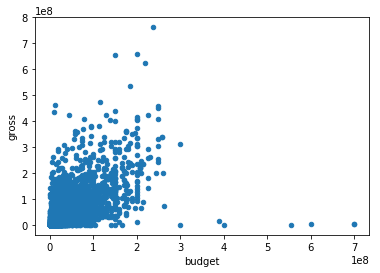

In [45]:
df[df.budget < 1000000000.0][['budget', 'gross']].plot(x='budget', y='gross', kind='scatter')

### 12. Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question -- > skipped (Scott instructed)

### 13. Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

In [53]:
nicolas_score = df[df.actor_1_name == 'Nicolas Cage'].imdb_score.mean()
print('Nicolas Cage: {:.2f}'.format(nicolas_score))


Nicolas Cage: 6.21


In [55]:
imdb_avg = df.imdb_score.mean()
print('imdb avg: {:.2f}'.format(imdb_avg))

imdb avg: 6.44


Since Nicolas Cage's mean value of imdb_score is lower than mean value of overall imdb_score, Nicolas Cage's movie score is worse than the rest of IMDB 5000+.

### 14. Have any years grossed a statistically-significant higher amount than the other years?

In [56]:
gross_year = df[['title_year', 'gross']].groupby('title_year')
gross_year_sum = gross_year['gross'].sum()
gross_year_sum.sort_values(ascending=False).head(5)

title_year
2013.0    1.049929e+10
2012.0    1.041541e+10
2014.0    1.022056e+10
2010.0    9.917119e+09
2009.0    9.901023e+09
Name: gross, dtype: float64